 # <center>Lecture 2: Bayes' Rule  </center>  
 
 ## <center> Instructor: Dr. Hu Chuan-Peng  </center>

## Part 1: 【和鲸平台】整合教学+练习

首先，点击链接加入课程组织：  

https://www.heywhale.com/org/NNUPsy/register?source=href&key=ec08f4798ab34797566769c6#  


![Image Name](https://cdn.kesci.com/upload/sjkv5mr9pt.jpeg?imageView2/0/w/960/h/960)  

![Image Name](https://cdn.kesci.com/upload/sjkv6sfths.jpeg?imageView2/0/w/960/h/960)  




其次，点击链接获得《Bayesian_2024》的访问权限：  
https://www.heywhale.com/org/NNUPsy/coc-invitation/c1d3f4ae71d74e98f00f9411#  


![Image Name](https://cdn.kesci.com/upload/sjkvdnghh8.jpeg?imageView2/0/w/960/h/960)  

![Image Name](https://cdn.kesci.com/upload/sjkvdv58qc.jpeg?imageView2/0/w/960/h/960)  

![Image Name](https://cdn.kesci.com/upload/sjkve2xqw3.jpeg?imageView2/0/w/960/h/960)  


更重要的是：任何问题都可以微信群或者平台里发帖提问。  

助教和老师会尽快回复的 🚀。  


![Image Name](https://cdn.kesci.com/upload/sjkvf5nlsl.jpeg?imageView2/0/w/960/h/960)  

![Image Name](https://cdn.kesci.com/upload/sjkvfd5d65.jpeg?imageView2/0/w/960/h/960)  



当然，你也可以选择在gitee上进行提问。  
点击链接访问gitee：  
https://gitee.com/hcp4715/bayesian-analysis-nnupsy  

![Image Name](https://cdn.kesci.com/upload/sjkvfsm4c1.jpeg?imageView2/0/w/960/h/960)  


 ## Part 2: 单一事件的贝叶斯模型

**“贝叶斯统计如何帮助预测文章的可重复性”**  

随着在线新闻和社交媒体平台的快速发展，虚假信息的传播呈现井喷式增长。  
因此，我们迫切需要有效的方法来评估学术研究的真实性。  

因此，**我们需要你来扮演“实施核查员 (fact-checker)”帮助读者判断研究的可信度**。  

-  根据社会科学领域299个公开数据分析的研究发现，不可复制的研究通常写得含糊不清；而可复制的研究往往表现出更高的语言自信度。  
-  那么，语言风格能否成为我们预测研究是否可以被成功复制的重要特征？  


以下代码展示了部分数据，包括新闻的标题 (tiltle)，网址 (url)，作者 (author) 和文章标记 (type)

In [13]:
# 导入数据加载和处理包：pandas
import pandas as pd
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt

# 使用 pandas 导入示例数据
try:
  df = pd.read_csv("/Users/ss/Documents/bayes_2024/2024/data/language_replicated.csv")
except:
  df= pd.read_csv('2024/data/language_replicated.csv')

In [14]:
df.head()

,study_name,stu_id,replicated,posemo,certain
0,study,1,1,1.36,1.75
1,study,3,0,1.92,1.17
2,study,4,1,1.41,1.36
3,study,5,0,1.85,0.69
4,study,6,0,0.63,0.72


In [15]:
# 数据预处理
# 计算 'certain' 列的中位数
median_certain = df['certain'].median()

# 创建新列，编码规则：大于中位数为 1，小于等于中位数为 2
df['language_style'] = df['certain'].apply(lambda x: 1 if x > median_certain else 2)

# 输出结果
print(df)

    study_name stu_id  replicated  posemo  certain  language_style
0        study      1           1    1.36     1.75               1
1        study      3           0    1.92     1.17               1
2        study      4           1    1.41     1.36               1
3        study      5           0    1.85     0.69               2
4        study      6           0    0.63     0.72               2
..         ...    ...         ...     ...      ...             ...
294      study   313b           0    2.93     2.36               1
295      study    34a           0    0.76     2.02               1
296      study    34b           0    4.48     0.22               2
297      study    36a           0    1.30     1.17               1
298      study    36b           1    0.94     0.57               2

[299 rows x 6 columns]


In [25]:
print(df.columns)

Index(['study_name', 'stu_id', 'replicated', 'posemo', 'certain',
       'language_style', 'language_style_code'],
      dtype='object')


In [27]:
# 数据预处理
# 计算 'certain' 列的中位数
median_certain = df['certain'].median()

# 创建新列，编码规则：大于中位数为 1，小于等于中位数为 2
df['language_style'] = df['certain'].apply(lambda x: 1 if x > median_certain else 0)

df['language_style_code'] = df['language_style'].map({1:"certain",0:"uncertain"})
df['replicated_code'] = df['replicated'].map({1:"yes",0:"no"})

# 输出结果
print(df)

    study_name stu_id  replicated  posemo  certain  language_style  \
0        study      1           1    1.36     1.75               1   
1        study      3           0    1.92     1.17               1   
2        study      4           1    1.41     1.36               1   
3        study      5           0    1.85     0.69               0   
4        study      6           0    0.63     0.72               0   
..         ...    ...         ...     ...      ...             ...   
294      study   313b           0    2.93     2.36               1   
295      study    34a           0    0.76     2.02               1   
296      study    34b           0    4.48     0.22               0   
297      study    36a           0    1.30     1.17               1   
298      study    36b           1    0.94     0.57               0   

    language_style_code replicated_code  
0               certain             yes  
1               certain              no  
2               certain          

### 先验 (prior) 和 数据 (data) 的差异  

#### 先验  

先验是指在*当前事件*发生之前，对事件发生的事先猜测或推断。例如，“太阳今天能否从东边升起”，根据以往的经验，太阳几乎每天都从东边升起，因此我们可以合理地推测，太阳今天从东边升起的先验概率非常接近100%。

在本例中，我们从先验经验得出约40%的实验是可重复的，而通过观测实际数据，得到了42.14%的可重复实验。
这说明数据与我们的先验经验较为一致，但略有差异。

- 先验可以是完全主观的。例如，有的人可能认为50%的研究是可重复的，而另一些人则根据不同的经验或数据得出30%的先验概率。
- 关键点在于，先验是对事件发生之前的主观看法，而不是基于新数据的结论。

In [29]:
# 计算可重复性研究的数量和百分比 
level_counts = df['replicated_code'].value_counts()
level_percentages = df['replicated_code'].value_counts(normalize=True) * 100

# 百分比保留两位小数
level_percentages = level_percentages.round(2)

# 创建一个新的 DataFrame 合并结果
result_df = pd.DataFrame({'数量': level_counts, '百分比': level_percentages})
# 展示结果
result_df

,数量,百分比
replicated_code,,
no,173,57.86
yes,126,42.14


#### 数据  

之前的信息只考虑了可重复研究与不可重复研究的比例，根据这一简单的比率，我们只能得到关于研究可重复性的一般性推测。  

一个有趣的现象是，使用更自信语言的研究，往往更容易被重复。例如，研究中使用明确、果断的表述，如“我们的结果高度可靠”。

我们的**数据**也支持这一点，通过查看数据集可发现，约45%（78/173）的不可重复研究使用了确切的语言风格，而在可重复的研究中，有 56%（71/126）的研究使用了确切的语言风格:

In [30]:
# 计算不同水平的数量
result_df = df.groupby(['replicated_code', 'language_style_code']).size().unstack()
# 结果
result_df


language_style_code,certain,uncertain
replicated_code,,
no,78,95
yes,71,55


#### 先验 vs 数据  

现在，我们获得了两种信息：先验信息 (prior) 表明 40% 的研究是可重复的，而通过数据 (data) 分析发现，使用更自信语言的研究更有可能是可重复的。  

我们如何结合两种信息进行推断？ 如何在先验信息与数据之间进行权衡？  

这就是贝叶斯学派关注的问题。  

![Image Name](https://cdn.kesci.com/upload/sjkvl0f6gx.png?imageView2/0/w/960/h/960)  

$$  
Posterior = \frac {data * \, prior}{Average \, probability \, of \, data}  
$$  


#### 先验概率模型(Prior probability model)  

首先，我们将一项研究是否为可重复性研究的概率进行形式化  

$$  
P(B) = 0.40 \\  

P(B^{c}) = 0.60  
$$  

$B$表示一项研究为可重复性研究的概率，$B^{c}$则表示一篇研究不可重复性研究的概率($B^{c}:B$ complement)



| 事件	    |$B$         |$B^{c}$ |Total|  
|---------- |------------|--------|-----|  
|probability|0.4         |0.6     |1    |  



**$P(B)$** 和 **$P(B^{c})$** 构成了研究可重复性概率的先验模型(prior model)  

作为一个有效的概率模型(valid probability model)，它必须：  

（1）考虑所有可能的事件（所有文章都必须是可重复或不可重复的，没有其他可能性）；  

（2）它为每个事件分配先验概率；  

（3）这些概率加起来为1。

### 条件概率&似然  

**形式化数据结果**  

先前我们提到，$B$表示一项研究为可重复性研究的概率，$B^{c}$则表示一篇研究不可重复性研究的概率($B^{c}:B$ complement)。
那么在我们的例子中，$A$则代表使用自信语言的研究

所以文章语言是否表现出自信（即不使用模棱两可的语言）依赖于文章是否可重复，或者可以说以文章的可重复性为前提条件。  

我们可以对数据结果(data)进行形式化，用条件概率的形式来表示文章表现出自信的可能性。  
$$  
P(A|B^{c}) = 0.4508 \approx 0.45
$$
- 表示在研究是不可重复的情况下，使用自信语言的概率是 45%。
$$  
P(A|B) = 0.5635 \approx 0.56
$$
- 表示：在研究是可重复的情况下，使用自信语言的概率是 56%。  

#### 条件概率  

接下来，我们要介绍条件概率，其表示为$P(A|B)$，表示“A在B发生的条件下发生的概率”。
$P(A|B)$与$P(A)$的对比，表示事件B的发生如何影响我们对事件A的认知。

例如：

1. 在一些时候，事件B发生可能使得事件A发生的可能性增加，例如，每天跑步的人参加马拉松活动的概率高于一般人群，即：  
$$  
P(参加马拉松|跑步) > P(参加马拉松)  
$$  

1. 而有些时候，事件B的发生则可能使得事件A发生的可能性降低，例如，如果你每天跑步，那么你超重的几率可能小于一般人群，即：  
$$  
P(跑步|超重) < P(超重)  
$$  

1. 并且注意$P(A|B) \neq P(B|A)$ \  
比如，所有种类的苹果都是水果，但不是所有水果都是苹果  
$$  
P(水果|苹果) = 1  
$$  

$$  
P(苹果|水果) < 1  
$$  

4. 当A与B相互独立时，B的发生则不会影响我们对A事件的认知  
比如，天气晴朗和赢得彩票之间是没有关系的，二者是独立的事件  
$$  
P(赢得彩票|天气晴朗) = P(赢得彩票)  
$$

#### 似然(likelihood)  

**似然的定义**  

从条件概率中我们知道，$P(A|B) = 0.56，P(A|B^{c}) = 0.45$，即使用确切语言的研究更有可能是可重复的。

因此，当前的数据（研究使用确切语言）在某种假设下出现的可能性较大。在这个例子中，我们比较不同假设下数据出现的可能性：

那么当前的数据（使用更确切的语言）更可能在某种假设下出现。在这个例子中，我们比较不同假设下当前数据出现的可能性：  

$P(A|B) = 0.56 > P(A|B^{c}) = 0.45$  

这就是似然函数(likelihood function)的含义，它表明在不同假设下，数据$A$出现的概率，即条件概率的组合。


例如，针对“数据 A：研究使用自信语言”的似然函数可以写成：$L(|A)$  
$$  
L(B|A) = P(A|B) \quad\quad L(B^{c}|A) = P(A|B^{c})  
$$  

这表示在“研究可重复”和“研究不可重复”两种假设下，使用自信语言的概率。

注意：在似然函数中，数据（即研究使用自信语言）是已知的，而假设（研究是否可重复）是我们需要推断的。

### 概率(Probability) vs 似然(likelihood)  

当假设$B$是已知的，条件概率函数$P(|B)$允许我们比较在假设$B$发生的前提下，各种可能事件$A$或$A^{c}$发生的概率。  

例如，假设$B$表示一项研究是可重复的，我们可以用$P(使用自信语言|研究可重复)$来衡量在可重复研究中的自信语言的可能性。  

下表对以上的信息做了一个总结，注意：  
* 先验概率的总和等于1，因为先验表示所有可能结果的分布；  
* 似然总和不等于1，因为似然函数不是概率函数，它告诉我们事件A在不同假设下发生的相对可能性。

TABLE 2.2: Prior probabilities and likelihoods of reproducible research.  

| event   |   $B$       | $B^c$  | Total   |  
| -------- | -------- | --------  | -------- |  
| prior   | 0.4      | 0.6      | 1          |  
| likelihood | 0.56 | 0.45 | 0.494 |

### 分母（normalizing constant）-- **边际概率 (marginal probability)**  

似然函数有效总结了在可重复性研究中使用自信语言的情况，但我们仍然需要得知，在所有研究中使用自信语言的总体概率如何。  
这被称为边际概率 $P(A)$  


$$  
Posterior \sim P(B|A) = \frac {data * prior}{Average probability of data} = \frac{P(A\cap B)}{P(A)} = \frac{L(B|A) * P(B)}{P(A)}  
$$  
 
所有研究中使用自信语言的概率可以分为两部分：  

1. 可重复研究中使用自信语言的概率，即$P(A\cap B)$  
2. 不可重复研究中使用自信语言的概率，即$P(A\cap B^{c})$  

两者之和即为边际概率。  
$$  
 P(A) = P(A \cap B) + P(A \cap B^{c}) = L(B|A) * P(B) + L(B^{c} | A) * P(B^{c})  
$$  

$$ P(A) = 0.56 * 0.4 + 0.45* 0.6 = 0.494 $$  


### 后验概率模型(Posterior probability model via Bayes’ Rule)

**直觉理解**  

现在，我们来尝试计算后验概率，比如计算使用自信语言的研究是可重复的概率$P(B|A)$。  

在正式计算之前，我们可以回顾一下这个表格来建立一些直觉。  


||$B$|$B^c$|Total|  
|---|---|---|---|  
|$A$|0.224|0.27|0.494|  
|$A^c$|0.176|0.33|0.506|  
|Total|0.4|0.6|1|  

note：
- $A$ ：表示使用自信语言的研究。
- $A^c$ ：表示不使用自信语言的研究。
- $B$ ：表示研究是可重复的。
- $B^c$ ：表示研究不可重复的。



因为我们知道这项研究使用了自信语言，所以我们直接锁定A行，  
- 在A行中，45.3%(0.224/0.494)的研究是可重复的，35.6%(0.176/0.494)的研究是不可重复的。  
- 因此，根据后验概率 45.3%的可能性可以认为当前这一研究是可重复的。  


**正式计算**  

如何凭借贝叶斯公式的数学形式推导得到该结果？  

$$  
Posterior \sim P(B|A) = \frac {data * prior}{Average \, probability \, of \, data} ={\frac{P(A\cap B)}{P(A)}}={\frac{L(B|A) * P(B)}{L(B|A) * P(B) + L(B^{c}|A) * P(B^{c})}}  
$$  

- $P(B|A)={\frac{P(B)L(B|A)}{P(A)}}={\frac{0.4\cdot0.56}{0.494}}=0.453$  
- 当带入之前计算得到的数值到贝叶斯公式中，我们得到了自信语言为不可重复研究的概率。  

使用同样的方法，我们可以计算出未使用自信语言的研究为不可重复研究的概率，结果如下表。  
- 可以注意到：先验概率和后验概率的和均等于1。  

TABLE 2.4: The prior and posterior models of reproducibility.  


| event    | $B$     | $B^c$ | Total    |  
| --------  | -------- | -------- | -------- |  
| prior probability | 0.4 | 0.6 | 1 |  
| posterior probability | 0.453 | 0.547 | 1 |  


思考时间🧐：是否加入分母进行计算，在哪种情况下后验概率之和不为1？

### 后验模拟(Posterior simulation)  

如何使用代码实现后验概率的计算？  


1. 定义研究的可重复性与相应的先验概率

In [31]:
# 定义文章类型
article = pd.DataFrame({'replicated_code': ['yes', 'no']})

# 定义先验概率
prior = [0.6, 0.4]

2. 模拟一些可能被投放给你的研究

In [32]:
# 模拟生成 10000 项研究，包括其类型
np.random.seed(84735)
article_sim = article.sample(n=10000, weights=prior, replace=True)
# 查看前 10 行数据
article_sim.head(10)

,replicated_code
0,yes
1,no
1,no
1,no
1,no
0,yes
1,no
1,no
1,no
0,yes


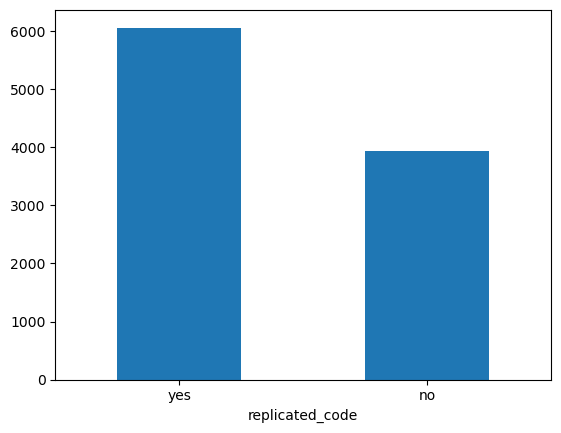

In [33]:
#我们可以通过画图来查看这些被投放研究的可重复性比例。
article_sim['replicated_code'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

3. 接下来我们需要模拟10000项研究使用确切语言风格的情况，  
- 和之前相同，不可重复研究使用确切语言风格的可能性为45% ，  
- 可重复研究使用确切语言风格的可能性为56% 

In [42]:
article_sim['data_model'] = np.where(article_sim['replicated_code'] == 'no', 0.2667, 0.0222)

# 定义研究是否使用确切语言
data = ['certain', 'uncertain']

# 设置随机种子，以便得到重复的结果
rng=np.random.default_rng(84735)
# 生成确切语言相关的数据
article_sim['language'] = article_sim.apply(lambda x: rng.choice(data, 1, p = [x.data_model, 1-x.data_model])[0], axis=1)

In [43]:
# 显示每个类别研究数量
(
  article_sim.groupby(['language', 'replicated_code'])
    .size()
    .unstack(fill_value=0)
)

replicated_code,no,yes
language,,
certain,1039,125
uncertain,2899,5937


4. 计算后验值  

还记得我们的先验概率为：  
- 可重复研究  $P(B)=0.4$  
- 不可重复性研究 $P(B^c)=0.6$,  


由以上结果可计算似然：  
- 大约26%(1039/(1039+2899))的可重复性研究使用了自信语言, $P(A|B)=0.26$
- 2%的不可重复性研究使用自信语言(125/(125+5937)), $P(A|B^c)=0.02$

结合先验和似然，我们可以进一步计算分母(边际概率)：  
- $L(B|A)*P(B) + L(B^{c}|A)*P(B^{c}) = 0.26*0.4 + 0.02*0.6 = 0.116$  

最后，我们可以计算的到后验 (使用自信语言研究中，可重复性研究的概率)：  
- $P(B|A) ={\frac{L(B|A)*P(B)}{P(A)}}= (0.26*0.4)/0.116 = 89\%$  
- 在10000项研究中，使用自信语言的研究有1164篇(分母)  
- 而现在，我们可以知道，在使用自信语言的研究中，89%(1039/1164)的研究为可重复研究

In [44]:
print(article_sim['language'].unique())

['uncertain' 'certain']


In [45]:
usage_yes = article_sim[article_sim['language'] == 'certain']
print('使用确切语言的研究', usage_yes['replicated_code'].value_counts().sum())
usage_yes['replicated_code'].value_counts()

使用确切语言的研究 1164


replicated_code
no     1039
yes     125
Name: count, dtype: int64

同样地，通过画图来可视化使用自信语言的研究的情况

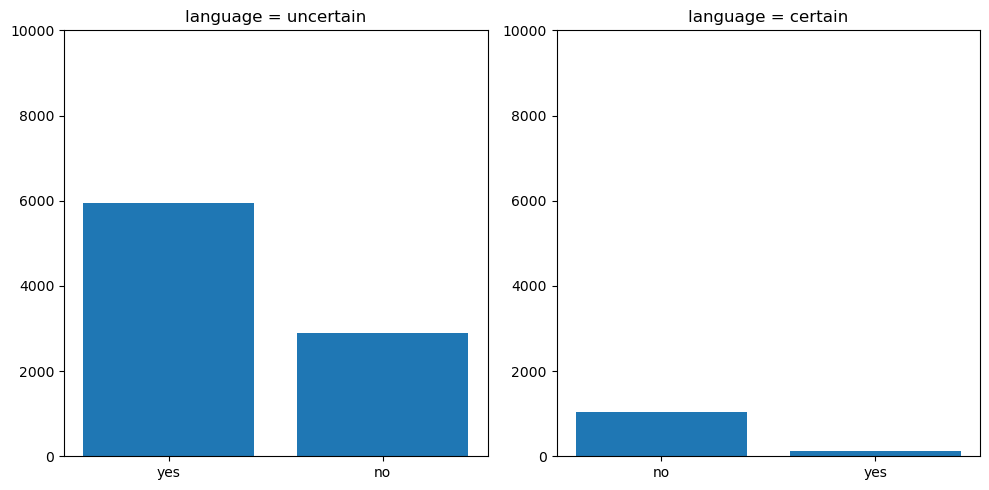

In [46]:
# 定义两幅图的坐标
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 绘制两幅图
for i, u in enumerate(article_sim['language'].unique()):
    ax = axes[i]
    data = article_sim[article_sim['language'] == u]
    ax.bar(data['replicated_code'].unique(), data['replicated_code'].value_counts())
    ax.set_title(f'language = {u}')
    ax.set_ylim(0, 10000) 

# 显示   
fig.tight_layout()
plt.show()

### 总结 (Recap)  

回到之前的问题：如何预测研究的可重复性？  
- 哪些信念可以作为先验概率？  
- 信息的哪些属性可以作为数据？  
- 如何结合先验和数据更新信念 (贝叶斯公式)。  
- 如何通过 python 实现以上的计算？

### Review  
TODO: 图片修改、替换  
图1 贝叶斯公式 推导  
图2 边际概率

## Part3 随机变量的贝叶斯模型

**随机变量 (random variables)**  

在之前的分析中，我们讨论了“可重复性研究”这一随机事件。接下来我们会针对更加抽象和一般性的**随机变量**进行贝叶斯分析。  

假设为了研究可重复性问题，一个有能力且资金充足的研究团队计划进行一系列可重复性实验，他们希望了解这些实验成功重复的比例是多少。  

首先我们来了解一个概念，胜率  

* 想象你玩斗地主，有五局三胜，七局四胜这一说，一轮玩下来，就会出现胜率。  
* 然而，胜率并不是一成不变的，它会随着每次游戏的输赢而变化。  
* 在每一轮开始前，你并不会知道你这次的胜率是多少  

在这个例子中也是这样，假设该团队对于任何研究成功复现的胜率为$\pi$，$\pi$是**未知的且会随着时间波动**，所以$\pi$是一个随机变量。  

In [ ]:
# 导入数据加载和处理包：pandas
import pandas as pd
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt
# 导入高级绘图工具 seaborn 为 sns
import seaborn as sns
# 导入统计建模工具包 scipy.stats 为 st
import scipy.stats as st 

# 设置 matplotlib 样式为 apa
import matplotlib.style as mplstyle
mplstyle.use('../input/apa.mplstyle')

**特定胜率下的成功复现结果**  

假设现在这个研究团队成功获得了资金，计划对6项研究进行重复实验。  

根据团队先前的成果与经验，我们猜测其成功复现的胜率为 $\pi = 50\%$。  

然而，实验还未开始，因此每一种成功复现的可能结果都可能发生。  

他接下来可能成功复现的次数Y可能是0，可能是1，也可能是6，可以有7种可能的成功复现次数，Y \in \{0,1,2,3,4,5,6\}，那么每一种结果的可能性分别是多少呢？  

**二项模型公式**  

要计算每一种结果的可能性，我们可以用二项分布来建模。  

该团队的胜率为$\pi$，$在\pi$下某获胜次数发生的概率可表示为：  

$$  
f(y|\pi) = \binom{n}{y} \pi^{y}(1-\pi)^{n-y} \quad\quad for\;y \in \{0,1,2,...,n\}  
$$  
$$  
\binom{n}{y} = \frac{n!}{y!(n-y)!}  
$$  

$\pi$ 表示成功的可能性，$y$表示在$n$个试次中成功的次数，二项模型含有的前提假设是：  

(1) 所有试次发生都是相互独立的  

(2) 在每个试次中，成功的概率都是一个固定的值$\pi$  

比如，获胜次数为0~6 的可能性可以分别写成：  

$$  
f(Y=0|\pi=0.5) = \binom{6}{0} 0.5^0 (1-0.5)^{6}  
$$  
$$  
f(Y=1|\pi=0.5) = \binom{6}{1} 0.5^1 (1-0.5)^{5}  
$$  
$$  
...  
$$  
$$  
f(Y=5|\pi=0.5) = \binom{6}{5} 0.5^{5} (1-0.5)^{1}  
$$  
$$  
f(Y=6|\pi=0.5) = \binom{6}{6} 0.5^{6} (1-0.5)^{0}  
$$  

---------------------------------  

我们可以使用代码帮助计算  
 `st.binom.pmf(y, n, p)`。其中 p 对应公式中的 $\pi$。

In [ ]:
y = [0,1,2,3,4,5,6]  # 获胜次数 
n = 6                # 比赛总次数
p = 0.5              # 假设的获胜概率

# 计算概率值
prob = st.binom.pmf(y, n, p)

result_table = pd.DataFrame({"获胜次数":y, "概率":prob})
result_table

In [ ]:
# 绘制灰色竖线
for i, j in zip(y , prob):
    plt.plot([i, i], [j, 0], 'gray', linestyle='-', linewidth=1, zorder=1, )

# 绘制黑色点(各胜率次数的胜率)
plt.scatter(y, prob, c='black')

plt.ylabel('$f(y|\pi)$')
plt.xlabel('y')

plt.xlim(-0.2,6.2)
plt.ylim(0,0.5)
plt.show()

*显然，当团队的成功概率为 0.5 时，其在六次研究中获得 y=3 次成功的概率最高(p = 0.216)。*


**概率质量密度函数(probability mass function, pmf)：** 用来描述离散型随机变量在各特定取值上的概率  

在上图中我们看到，成功次数y在不同的取值上的概率不同。  

* 由于$y$的个数是有限的，并且是随机发生的，我们把$y$称为离散型随机变量，而$y$发生的概率$f(y)$则被称为概率密度函数  


对于离散型随机变量$Y$，$Y$各取值的概率由$f(y)$指定：  
$$  
f(y) = P(Y=y)  
$$  

并且有如下性质：  

* 对所有y的取值来说，$0\leq f(y) \leq 1$  
* $\sum_{all\,\pmb{y}}f(y) = 1$，y取值的所有概率之和为1

In [ ]:
sum(result_table['概率'])

### 二项似然函数(The Binomial likelihood function)

**不同的信念**  

尽管该团队成功申请了项目基金，但并不是所有人都认同他们的成功复现率为 50%。  

对于团队成功的可能性，不同的人可能持有不同的信念：  

- 乐观派认为该团队的成功概率为 0.8，表示对实验成功复现持高度信心。  
- 悲观派则认为该团队的成功概率仅为 0.2，意味着对实验成功复现不太乐观。  

成功的概率影响着他们对研究复现结果的预期：如果团队的成功概率高，那么6次研究中成功复现的次数会更多；  
反之，如果成功概率低，那么研究复现的失败次数就会更多。  

我们可以计算持不同信念的人心中，该团队在6项研究中成功复现的次数的概率分布并画图。

In [ ]:
y = [0,1,2,3,4,5,6]  # 获胜次数 
n = 6                # 比赛总次数

# 计算似然值
p = 0.5              # 根据以往战绩假设的获胜概率
likelihood1 = st.binom.pmf(y, n, p)
p = 0.8              # Kasparov支持者眼中的获胜概率
likelihood2 = st.binom.pmf(y, n, p)
p = 0.2              # 深蓝支持者眼中的获胜概率
likelihood3 = st.binom.pmf(y, n, p)

result_table = pd.DataFrame({
  "获胜次数":y, 
  "可能性":likelihood1, 
  "Kasparov支持者":likelihood2, 
  "深蓝支持者":likelihood3})
result_table

In [ ]:
# 创建子图
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# 绘制三个图,每个子图类似原图
three_pi = ["previous ratio ($\pi = 0.5$)","Kasparov supporter ($\pi = 0.8$)","Deep Blue supporter ($\pi = 0.2$)"]
likelihoods = [likelihood1, likelihood2, likelihood3]
for i, ax in enumerate(axs):
    
    ax.scatter(y, likelihoods[i], c='black')
    
    for xx, yy in zip(y, likelihoods[i]):
        ax.plot([xx, xx], [yy, 0], 'gray', linestyle='-', linewidth=1, zorder=1)
    
    # 添加facet
    ax.set_title(three_pi[i])

    ax.set_xlim(-0.2,6.2)
    ax.set_ylim(0,0.4)

fig.supylabel('$f(y|\pi)$')
fig.supxlabel('y')
plt.tight_layout()
plt.show()

显然，对于乐观派来说，团队取得六次成功的概率远高于其他成功次数。而对于悲观派来说，团队全败的可能性远高于其他成功次数。  

换句话说，若团队在6项研究中仅成功复现一次，这种情况在低胜率下更可能出现，在高胜率下几乎不可能出现。  

那么团队成功重复的胜率，更可能(likelihood)是悲观派设想的那样($\pi = 0.2$)。  

<center>  

![](https://www.bayesrulesbook.com/bookdown_files/figure-html/binom-chess-like-1.png)  

</center>  

- 在乐观派和悲观派眼中(不同胜率$\pi$下)，6场比赛只获胜1次的似然(likelihood)。  

**似然函数**  

当团队只成功复现一次时，该事件在不同胜率下出现的可能性可以写为：  

$$  
f(Y=1|\pi=0.2) = \binom{6}{1} 0.2^1 (1-0.2)^{5}  
$$  
$$  
f(Y=1|\pi=0.5) = \binom{6}{1} 0.5^1 (1-0.5)^{5}  
$$  
$$  
f(Y=1|\pi=0.8) = \binom{6}{1} 0.8^1 (1-0.8)^{5}  
$$  

因此，成功复现次数为1时的似然函数可以写成  

$$  
L(\pi|y=1) = f(y=1|\pi) = \binom{6}{1} \pi^{1}(1-\pi)^{6-1} = 6\pi(1-\pi)^{5}  
$$  

不同胜率下的似然：  

| $\pi$	        |0.2    |0.5    |0.8  
|---------------|-----  |----   |----|  
|$f(\pi \| y=1)$   |0.3932  |0.0938 |0.0015|  




**注意：**  

似然函数表示的是，在各种可能的胜率$\pi$下,获胜次数$Y=1$的可能性，所以  

(1)该似然函数公式只取决于$\pi$  

(2)似然函数的总和加起来不为1（从条件概率的公式来看，似然函数的分母是不同的）

**Conditional PMF VS likelihood function**  

当$\pi$是已知的，条件概率质量密度函数$f(·|\pi)$允许我们比较在$\pi$发生的前提下，各种可能数据$Y$(e.g., $y_{1},y_{2}$)发生的概率。  
$$  
f(y_{1}|\pi) \; vs \; f(y_{2}|\pi)  
$$  

当$Y = y$是已知的，似然函数$L(·|y)= f(y|·)$允许我们比较在各种不同的$\pi$(e.g., $\pi_{1},\pi_{2}$)下，观察到数据$y$的相对可能性(relative likelihood)。  

$$  
L(\pi_{1}|y) \; vs \; L(\pi_{2}|y)  
$$  
$$  
=  
f(y|\pi_{1}) \; vs \; f(y|\pi_{2})  
$$  


**使用二项模型来描述获胜次数与胜率的关系**  

在$n = 6$的比赛中，团队成功复现的次数与胜率的关系符合二项模型  

$$  
Y|\pi \sim Bin(6,\pi)  
$$  


$$  
f(y|\pi) = \binom{6}{y} \pi^{y}(1-\pi)^{6-y} \quad\quad for\;y \in \{0,1,2,3,4,5,6\}  
$$  

-----------------------------------  

**图例**  

下图给出了几种 $f(y|\pi)$，即在不同胜率$\pi$下，不同获胜次数$Y$发生的可能性。  

* 黑线表示在特定胜率下，Y=1(赢一次)的似然值  

![Image Name](https://www.bayesrulesbook.com/bookdown_files/figure-html/binom-chess-1.png)

这个概率质量密度函数总结了在特定胜率$\pi$下观察到的成功复现次数$Y=y$的条件概率  

例如，当团队的胜率为0.8时，他复现6次研究成功的可能性大约为0.26  

$$  
f(y=0.6|\pi=0.8) = \binom{6}{6} 0.8^{6}(1-0.8)^{6-6} = 1\times0.8^{6}\times1 \approx 0.26  
$$  

而6次研究全部复现失败的可能性则接近为0  

$$  
f(y=0|\pi=0.8) = \binom{6}{0} 0.8^{0}(1-0.8)^{6-0} = 1\times0.2^{6}\times1 \approx 0.000064  
$$

**计算分母**  

在这个例子中，分母为$f(y=1)$，指在所有可能的胜率$\pi$下，团队成功复现一次的总体概率(total probability)。总体概率则是观察到$Y=1$似然值的总和，可以写为：  

$$  
f(y=1) = \sum_{\pi \in\{0.2,0.5,0.8\}} L(\pi|y=1)f(\pi)  
$$  

代入具体的值计算可得：  

$$  
f(y = 1)  = L(\pi = 0.2 | y=1) f(\pi = 0.2) + L(\pi = 0.5 | y=1) f(\pi = 0.5) + L(\pi = 0.8 | y=1) f(\pi = 0.8) \\  
 \approx 0.3932 \cdot 0.10 + 0.0938 \cdot 0.25 + 0.0015 \cdot 0.65 \\  
 \approx 0.0637  . \\  
$$  

结果表明，考虑到所有可能的胜率$\pi$，团队只成功一次的概率只有6%

### 先验概率模型(**Prior** probability model)

**建立先验模型**  

另一个有趣的问题是，$\pi$为随机变量，它的取值也存在一定的概率。  

- 换句话说，乐观派、悲观派和中立者的数量是不一样的。  
- 而当我们不确定三者具体人数时，我们可以通过设置先验的方式为不同支持者设定不同的数量，这代表了我们对每种支持者人数的**信念**。  

以下是一个我们随机设定的例子(先验)。  
- 其中，每种种类的概率 $f(\pi)$ 可随意设定。 例如，设定 $\pi_{0.2} = 0.1$， 或者 $\pi_{0.2} = 0.5$。 但需要所有$f(\pi)$的总和为1。  


| $\pi$	    |0.2  |0.5 |0.8 |Total  
|---------- |-----|----|----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65   |1|  



此外，$\pi$ 的数量也是可以变化的。  

- 例如，有一群对可重复性问题超级自信的人认为该团队不可能一次都不成功，即 $\pi = 0.01$。  
- 那么新形成的先验分布可能如下。  

 

| $\pi$    |   0.01  | 0.2  | 0.5  | 0.79  | Total |  
| -------- | --- | ---- | ---- | ---- | ----- |  
| $f(\pi)$ |  0.10   | 0.10 | 0.25 | 0.55 | 1     |  




### 后验概率模型(Posterior probability model)

根据之前我们设定的先验模型，团队复现成功的可能性很高 ($\pi_{0.8} = 0.65$)。  



| $\pi$	    |0.2  |0.5 |0.8 |Total  
|---------- |-----|----|----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65   |1|  



然而，根据先前的经验，该团队只成功复现过一次，这个数据告诉我们他的胜率很低。  

综合先验和似然，我们可以得到后验模型，其中 团队成功复现的概率从$\pi_{0.8}=0.65$降低为$\pi_{0.8}=0.015$。意味着，他胜率为0.2的可能性是最大的 $\pi_{0.2}=0.617$。  


![](https://www.bayesrulesbook.com/bookdown_files/figure-html/chesssummary-1.png)  
- 左图为先验模型  
- 中间的图为似然模型  
- 右边的图为后验模型

**后验模型的计算过程**  

上图所表示的后验可写成：  

$$  
f(\pi|y=1)  
$$  

表示当团队只赢成功复现一项研究时，他胜率$\pi$的概率分布  

根据贝叶斯公式，我们可以进一步对后验概率公式进行展开：  

$$  
posterior = \frac{ prior*likelihood} {normalizing\;\;constant}  
$$  

$$  
f(\pi|y=1) = \frac{ f(\pi)L(\pi|y=1)} {f(y=1)} \quad\quad for\;\pi \in {0.2,0.5,0.8}  
$$  

$$  
f(\pi=0.2|y=1) = \frac{0.10 \times 0.3932} {0.0637} \approx 0.617  
$$  
$$  
f(\pi=0.5|y=1) = \frac{0.25 \times 0.0938} {0.0637} \approx 0.368  
$$  
$$  
f(\pi=0.8|y=1) = \frac{0.65 \times 0.0015} {0.0637} \approx 0.015  
$$ 

下表对后验概率模型进行了总结，我们可知，经过了先前只成功了一项研究的复现经历后，该团队取得成功($\pi$=0.8)的可能性已经从0.65降到了0.015  


| $\pi$	        |0.2    |0.5    |0.8 |Total  
|---------------|-----  |----   |----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65|1|  
|$f(\pi \| y=1)$   |0.617  |0.368 |0.015|1|  


**补充材料**  

省略分母的计算  
- 考虑到分母是一个常数，我们常常会胜率计算它  

省略分母后验的计算可写成：  
$$  
f(\pi=0.2|y=1) = c⋅ 0.10⋅0.3932 \propto 0.039320  
$$  

$$  
f(\pi=0.5|y=1) = c⋅ 0.25⋅0.0938 \propto 0.023450  
$$  
$$  
f(\pi=0.8|y=1) = c⋅ 0.65⋅0.0015 \propto 0.000975  
$$  

$\propto$ 表示成比例，尽管这些未经标准化的后验概率总和不等于1  
$$  
0.039320 + 0.023450 + 0.000975 = 0.063745,  
$$  
但它们的比例关系并未改变(见下图)  

![](https://www.bayesrulesbook.com/bookdown_files/figure-html/ch2scaled-1.png)  



我们可以使用这些未经标准化的后验概率总和作为分母，来对后验概率进行标准化，会得到相同的计算结果。  

$$  
f(\pi = 0.2 | y = 1) = \frac{0.039320}{0.039320 + 0.023450 + 0.000975} \approx 0.617  
$$  

注意，分母为所有似然值的总和，因此后验概率的计算公式还可以写成：  

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} = \frac{f(\pi)L(\pi|y)}{\sum_{\text{all } \pi} f(\pi)L(\pi|y)} .  
$$

**Proportionality**  

既然$f(y)$是一个用来标准化的常数，它并不受$\pi$的影响，那么后验概率质量函数$f(\pi|y)$ 就与$f(\pi)$和$L(\pi|y)$成正比  

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} \propto f(\pi)L(\pi|y)  
$$  
即，  

$$  
posterior \propto prior⋅ likelihood  
$$

### Posterior simulation (with code)

### 1. 定义先验模型  
- 定义可能的胜率  
- 定义胜率的可能性

In [15]:
import pandas as pd
import numpy as np

# 定义可能的胜率
chess = pd.DataFrame({'pi':[0.2, 0.5, 0.8]})

# 定义先验模型
prior = [0.10, 0.25, 0.65]


### 2. 模拟在特定胜率下，6场比赛中的获胜次数  
- 重复这个过程10000次

In [ ]:
# 设置随机数种子保证可重复性
np.random.seed(84735)

# 从先验中抽取10000个 pi 值，并生成对应的y值

chess_sim = chess.sample(n=10000, weights=prior, replace=True)

chess_sim['y'] = np.random.binomial(n=6, p=chess_sim['pi'], size=len(chess_sim))

chess_sim.head(10)

In [ ]:
#对pi的抽取情况进行总结
chess_counts =  chess_sim['pi'].value_counts().reset_index()

chess_counts.columns = ['pi','n']

chess_counts['percentage'] = (chess_counts['n']/len(chess_sim))

chess_counts = chess_counts.sort_values(by='pi')

print(chess_counts)


### 3.  不同胜率下，不同获胜次数的分布情况$f(y|\pi)$

In [13]:
# 导入绘图工具 seaborn
import seaborn as sns
chess_lik = sns.FacetGrid(chess_sim,col="pi")
chess_lik.map(sns.histplot,'y',stat='probability',discrete=True)

### 4. 查看$y=1$时，对应的$\pi$的分布情况

In [14]:
chess_post = chess_sim[chess_sim['y'] == 1].value_counts()
chess_post

In [ ]:
chess_post = chess_sim[chess_sim['y'] == 1]

chess_post_plot = sns.histplot(data = chess_post, x="pi")

#plt.xticks(np.arange(0.2,0.8,0.3))

chess_post_plot.set(xticks=[0.2,0.5,0.8])
sns.despine()

## Part 4: 频率学派与贝叶斯学派的对比

### 频率学派如何看待这个世界？  


在对比频率学派与贝叶斯学派的差异之前，让我们首先回顾一下频率学派是如何看待这个世界的。


![Image Name](https://cdn.kesci.com/upload/image/rhqcgapoeq.png?imageView2/0/w/960/h/960)  


我们假设存在两个城市，其中A城市的平均工资为$6000$元每月，B城市的平均工资为$6500$元每月。  

然后，由于两个城市的人口太多，通过两个城市中所有人的工资去计算平均工作是*费时费力的*。其次，对于‘地球中大陆的占比’的问题，记录所有的陆地和海洋是不太可能的。  

因此，统计学家选择 **抽样** 的方式通过 **样本** 来估计两个城市 **总体** 的均值。

值得注意的是：  

1. 这个例子中两个总体均值的差异(工资差异)是**固定的**，即世界的真相是固定的。然而在真实的“大世界”中，比如人们幸福感上的差异，差异的“真相”是我们想要探索的，未知的。  

2. 通过抽样的方式去估计总体会存在**噪音**或者*偏差*。  

3. 频率学派认为**概率**是噪音的体现。结合前两点，两个城市的差异是固定的，而抽样带来了误差，因此概率代表的是样本能代表总体的概率。  

4. 噪音受到抽样**样本大小**和工资方差**变异**的影响。另一个常见的问题是抽样样本的概率分布与样本大小和总体方差有关，如下图。


![Image Name](https://cdn.kesci.com/upload/image/rhqcnfd9gl.png?imageView2/0/w/480/h/480)  


最后，频率学派如何**推断**出两个总体之间的差异？  
- 由于两个总体间的差异是固定的，因此，判断差异是否显著与噪声大小有关，即信噪比。  
- 频率学派通过零假设的显著性检验(Null hypothesis significant test, NHST)来判断这个显著性。即通过拒绝极端值的方式避免噪音的影响。在数学上通过计算置信区间(confidence interval)和$p$值来帮助推断过程。

### 贝叶斯学派如何看待这个世界？

贝叶斯学派的出现与兴趣在于频率学派所存在的问题。  
主要体现在2个方面：  
1. 世界的真相(差异)可能不是固定的。比如对于复杂世界现象背后的机制是难以确定的。  
2. 通过抽样样本去替代总体容易出现偏差。比如由于抽到极端值从而错误的估计总体。此外，相关的问题还有type Ⅰ错误，统计检验力，*p*-hacking等。

贝叶斯学派提供了另一种角度去解释上述的问题。  

- 首先，贝叶斯学派认为世界的真相不是固定不变的，并且他们通过概率去描述这种变化。比如，两个城市平均工资的差异可能受到各种因素的影响，因此这个差异不是固定的。而两个城市平均工资的差异或可能性，比如这个差异为$500$的概率为$80$%，代表了个体对这个差异的信念**(belief)**，比如有$80$%的把握相信这个差异为$500$。  

- 其次，贝叶斯学派并不是通过NHST来推测这个差异。而是通过贝叶斯公式。需要注意的是，虽然贝叶斯学派认为世界的真相并不是固定的，但总世界中所观测的现象(抽样样本得到的数据)是固定的。因此，对于世界真相的信念可以根据数据进行更新。

#### Thomas Bayes  
![Image Name](https://pic2.zhimg.com/v2-ae48785e2b67af851e236b3d38c78c8d_r.jpg)  


#### Pierre Simon Laplace  

![Image Name](https://th.bing.com/th/id/R.c252b05834293b10a3005882940d6622?rik=Kr8G5HIK%2fObbHw&riu=http%3a%2f%2fimages.fineartamerica.com%2fimages-medium-large%2fpierre-simon-marquis-de-laplace-maria-platt-evans.jpg&ehk=uHIIZ0qdCLmD0FXAHR4lUGfySQGNKlhNkJgoWIOMJG4%3d&risl=&pid=ImgRaw&r=0)  


### 两个学派的差异对比  


|                     | 频率学派   | 贝叶斯学派   |  
| ------------------- | ---------- | ------------ |  
| 世界真相 (参数) | 固定       | 变化         |  
| 概率                | 抽样的噪音 | 信念         |  
| 推断过程            | NHST       | 贝叶斯定理   |  
| 数据                | 存在噪音   | 固定         |  
| 推断可更新性        | 否         | 是           |  
| 主观性              | 前提预设   | 通过先验设定 |

### 贝叶斯的主观性  

**任何统计分析方法都不可能完全客观，因此主观性是一个相对概念:**  

* 贝叶斯学派的主观性通过先验的设定来体现，透明，不易让人产生误解  

* 频率学派的主观性暗含在各种**前提预设**中，比如方差分析中的方差齐性和正态性，这种看似‘客观的’预设，一方面难以满足，一方面也是一种主观的设定。  

* 更为宏观的来说，样本的抽取，数据清理方式的选择，分析方法的选择，$p$值的设定，这些都存在主观性。因此，频率学派并没有想象的那么‘客观’。  

* 主观不一定是坏事：通过量化方法将个体的经验和专家知识整合到数据分析之中。  



#### 重复抽样的不同作用

##### 频率学派  
* 统计推断依赖于参数的**抽样分布**，即只要无限(long-run)的进行抽样，样本分布的参数就会有某种分布形式；  
* NHST中的$p$值和置信区间的解读均依赖于“无限次抽样”的预设；  
* 实际操作中，我们往往只会收集一次数据，并不会反复的进行抽样；有些情境中，预设“无限次重复抽样并不合理；  

##### 贝叶斯学派  
* 假定参数本身是分布，不确定性一起存在于推断之中；  
* 直接根据数据对先验信念进行更新；  

**置信区间(confidence interval) vs 可信区间(credible interval)**  

**No free lunch: 各有优势和缺陷**

#### 不同的先验和似然会产生不同的后验分布  

![Image Name](https://cdn.kesci.com/upload/image/rhqcb9gji7.png?imageView2/0/w/500/h/500)  


#### NHST的"弱项"

* 无法直接对零假设(null hypothesis)进行支持，即如果两个总体没有显著差异，他们的相似程度有多少？  (许岳培等, 2023, *应用心理学*)  

* 一次性只能对比两个总体的假设进行比较；  

* 控制假阳性是一个棘手的问题